In [1]:
##%matplotlib widget
## with %matplotlib notebook: seems to require ipympl as part of environment, either
## part of the conda environment or "pip install ipympl"
## otherwise, does not show ANY plots in notebook, plt.savefig() works
%matplotlib notebook  
##%matplotlib inline    ## --plt.savefig()  works, but re-sizing does NOT


Check the current GPU usage. Please try to be nice!

> **WARNING**: The card numbers here are *not* the same as in CUDA. You have been warned.

## Imports

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import time
import torch
import pandas as pd

# Python 3 standard library
from pathlib import Path

from torchsummary import summary

### Set up local parameters

Make the output directory if it does not exist:

## Get the helper functions

Add the directory with the model
definitions to the path so we can import from it:

> When you type `import X`,
Python searches `sys.path` for a python
file named `X.py` to import. So we need to add the model directory to the path.

In [3]:
# From model/collectdata.py
from model.collectdata_poca_KDE import collect_data, read_data

# From model/loss.py
##from loss import Loss
from model.alt_loss_A import Loss

# From model/training.py
from model.training import trainNet, select_gpu

# From model/models.py
##  will start with model from TwoFeatures_CNN6Layer_A in the first instance
##  see relevant cell below


from model.models_mds_01June20 import SimpleCNN5Layer_Ca as Model

from model.training import trainNet, select_gpu, Results
from model.plots import dual_train_plots, replace_in_ax

In [4]:
##X_A, X_B, kernel, xMax, yMax = read_data('dataAA/100_POCA_kernel_val_A.h5',
##                             masking=True)

## this input file uses probabilities accounting for sqrt(determinant) in the denominator
X_A, X_B, kernel, xMax, yMax = read_data('dataAA/20K_POCA_kernel_evts_200926.h5',
                             masking=True)
                           

Loading data...
Loaded dataAA/20K_POCA_kernel_evts_200926.h5 in 6.442 s


X_A,shape =  (20000, 1, 4000)
len(X_A) =  20000
np.max(kde_A) =  0.5917969 np.max(kde_B) =  0.74072266 np.max(old_kde) =  0.57666016
scaled ratio = 1.026 


<IPython.core.display.Javascript object>


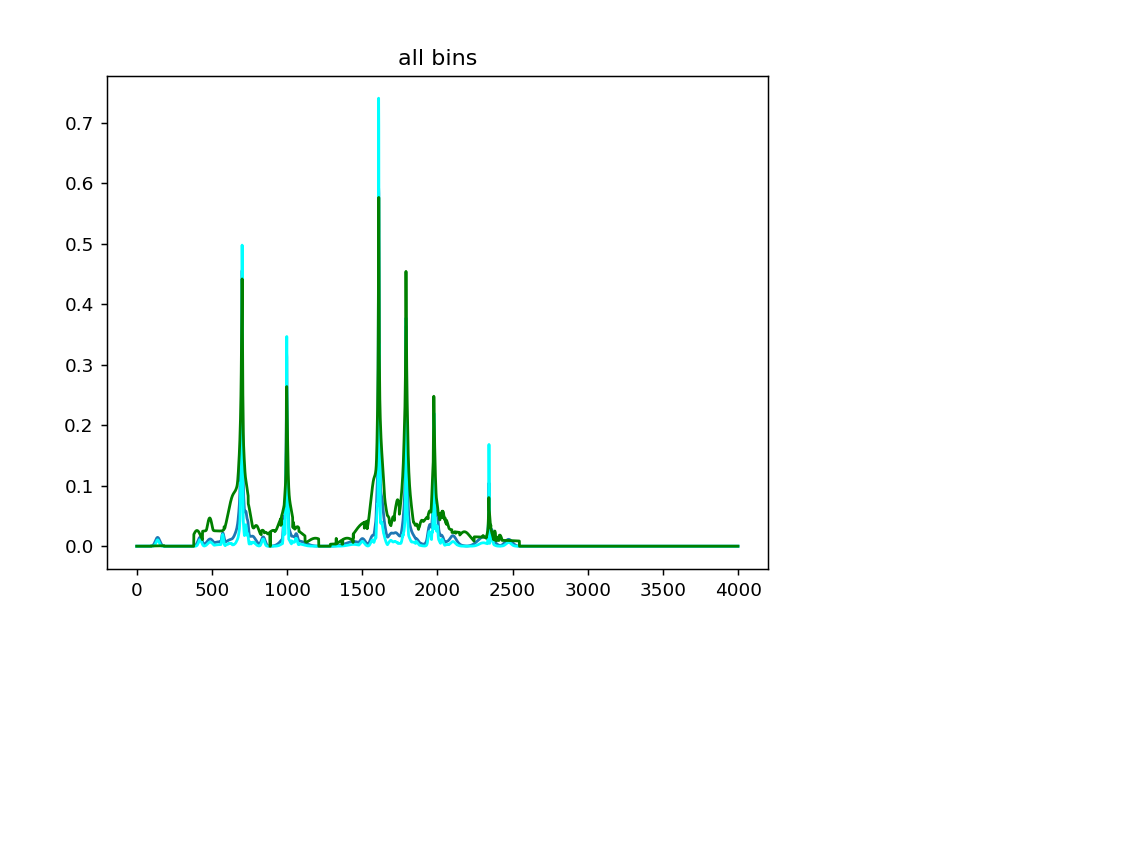

<IPython.core.display.Javascript object>


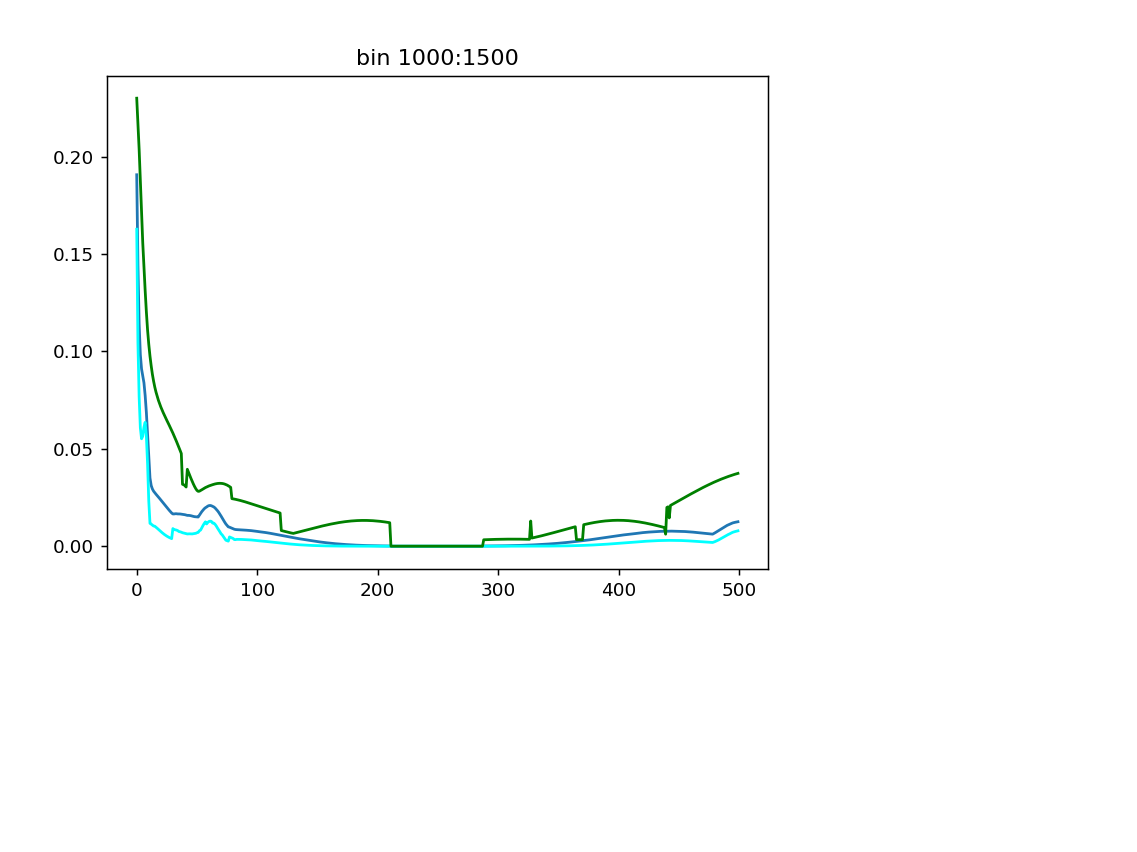

<IPython.core.display.Javascript object>


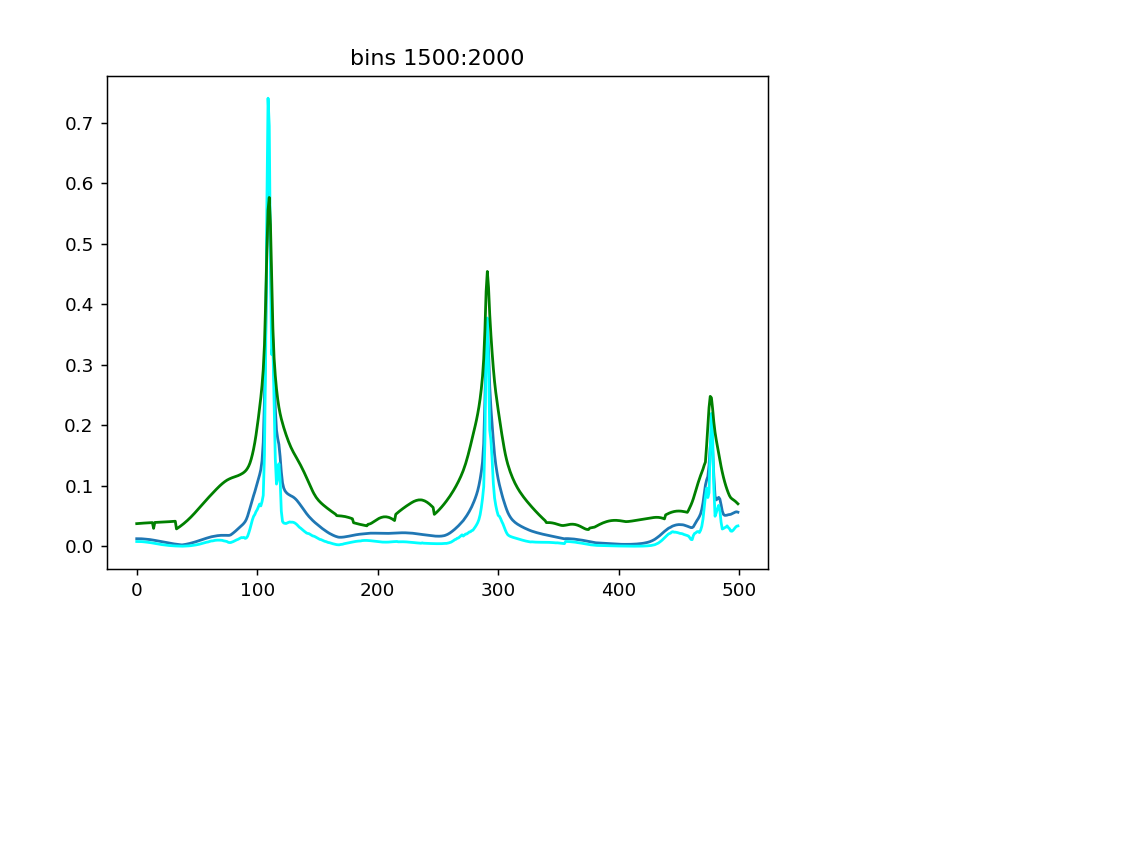

np.max(kde_A) =  0.107666016 np.max(kde_B) =  0.117126465 np.max(old_kde) =  0.08782959
scaled ratio = 1.226 


<IPython.core.display.Javascript object>


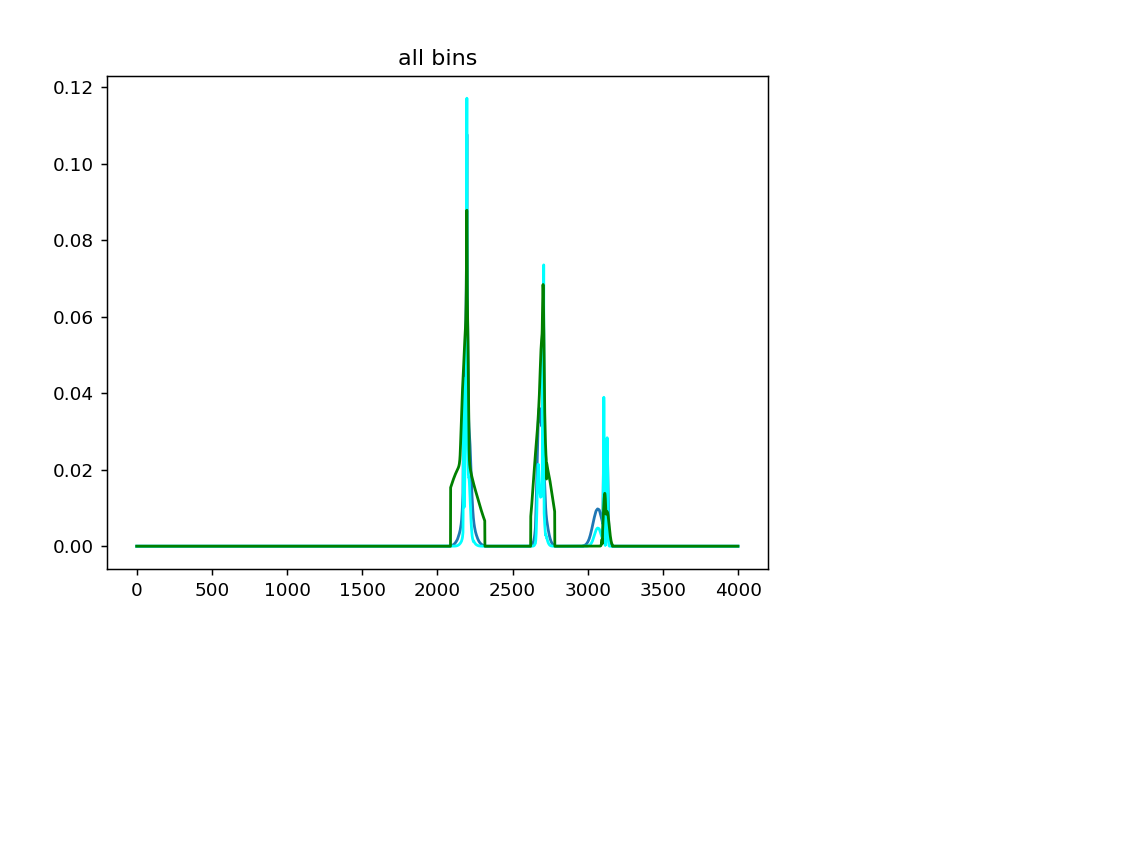

<IPython.core.display.Javascript object>


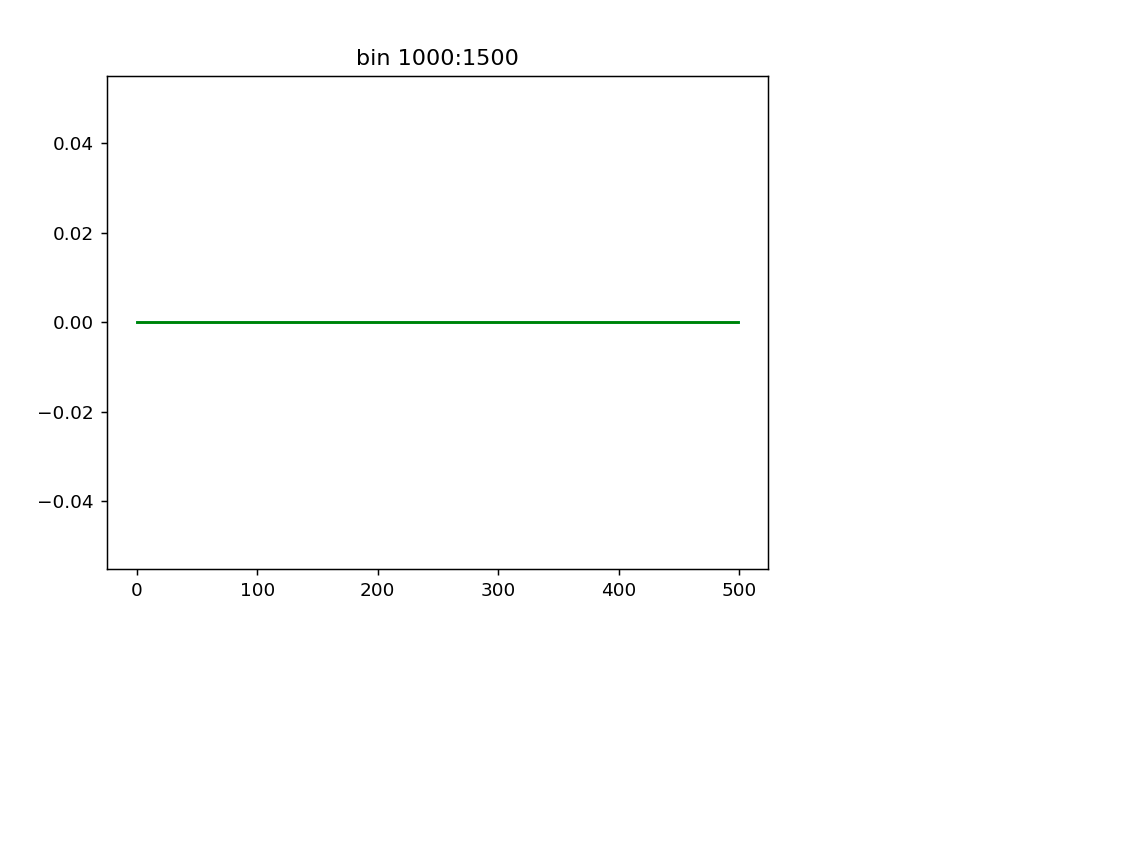

<IPython.core.display.Javascript object>


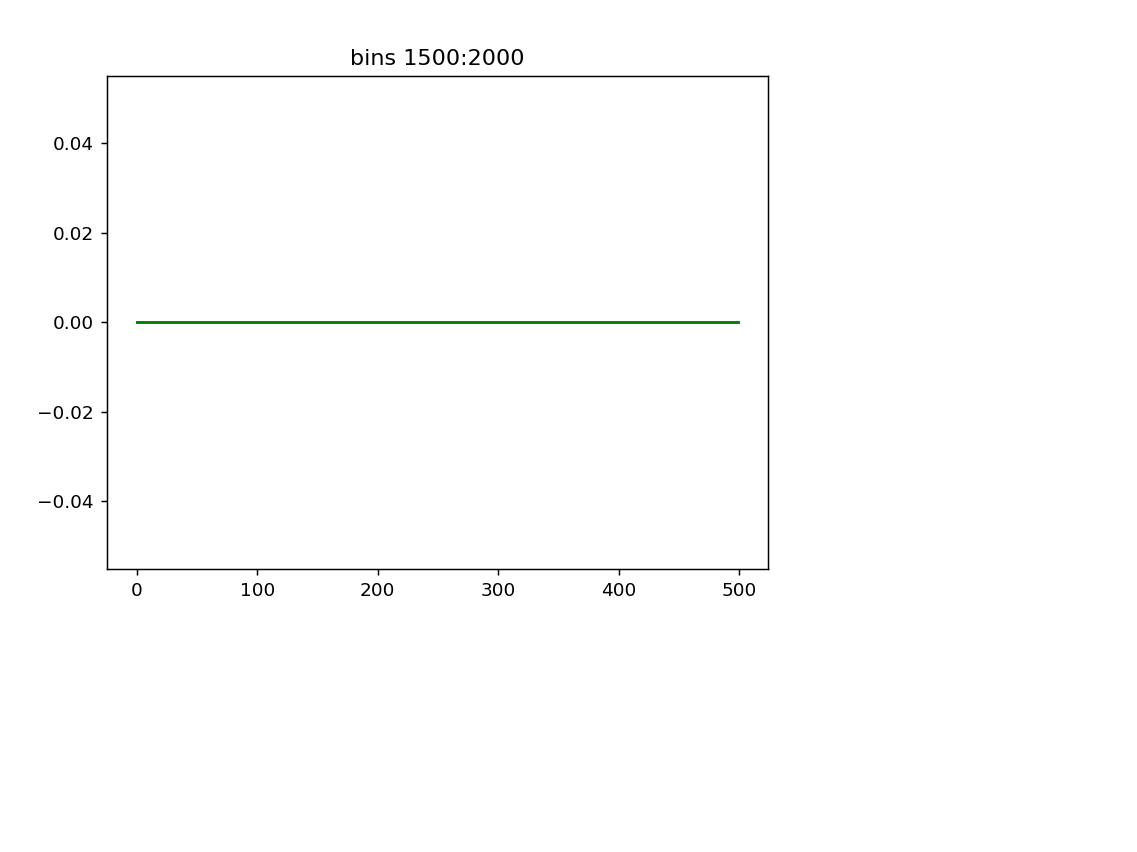

np.max(kde_A) =  0.12878418 np.max(kde_B) =  0.15991211 np.max(old_kde) =  0.12176514
scaled ratio = 1.058 


<IPython.core.display.Javascript object>


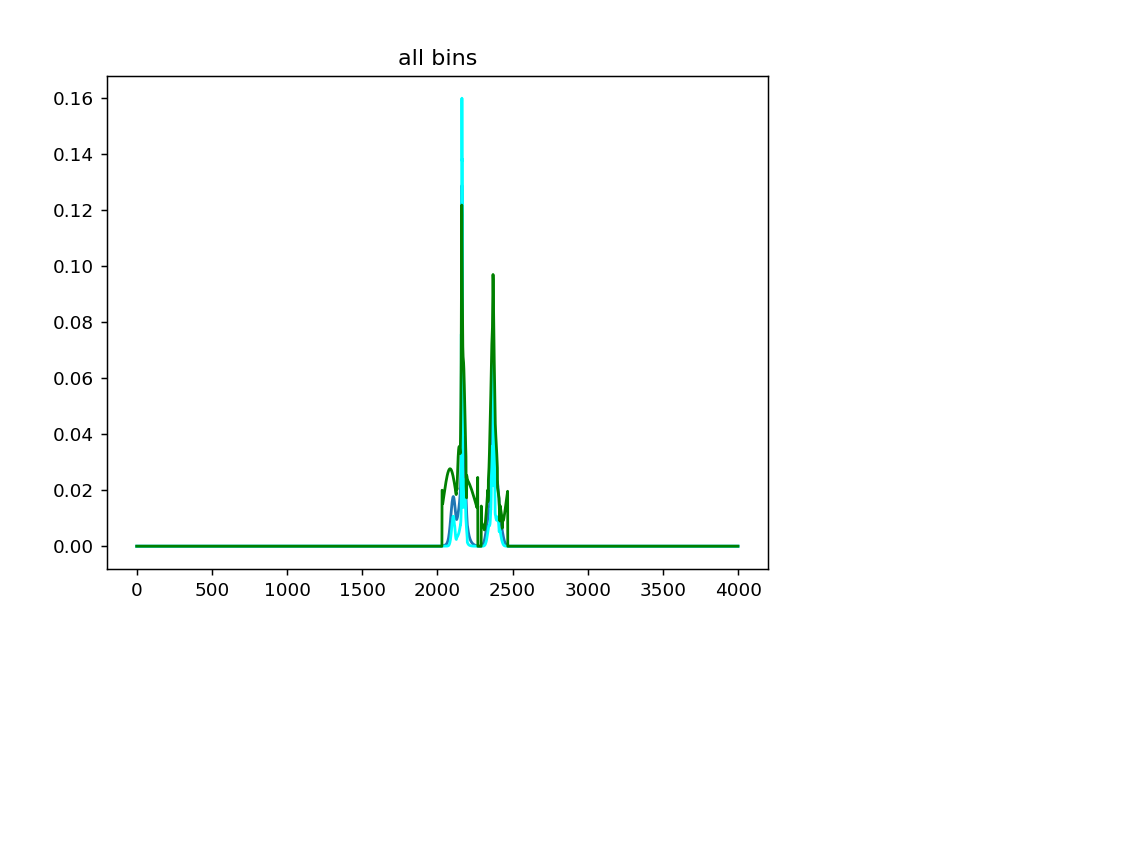

<IPython.core.display.Javascript object>


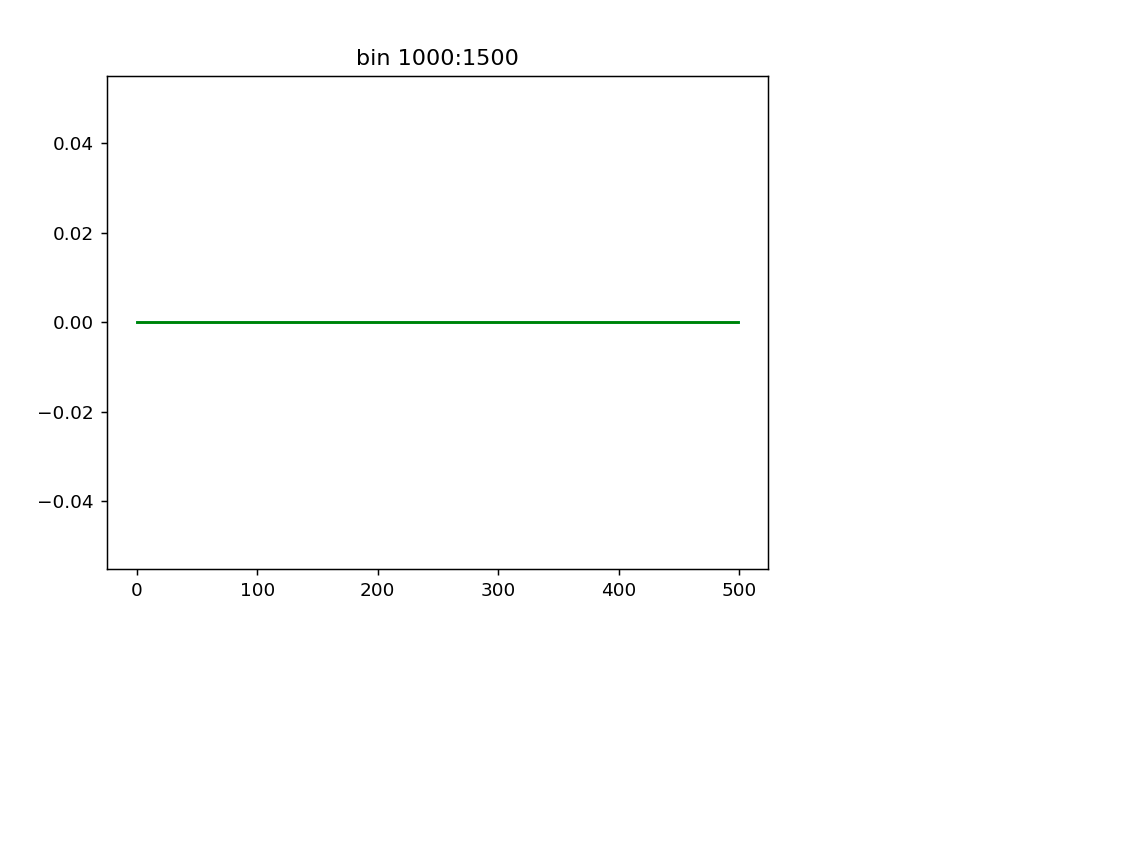

<IPython.core.display.Javascript object>


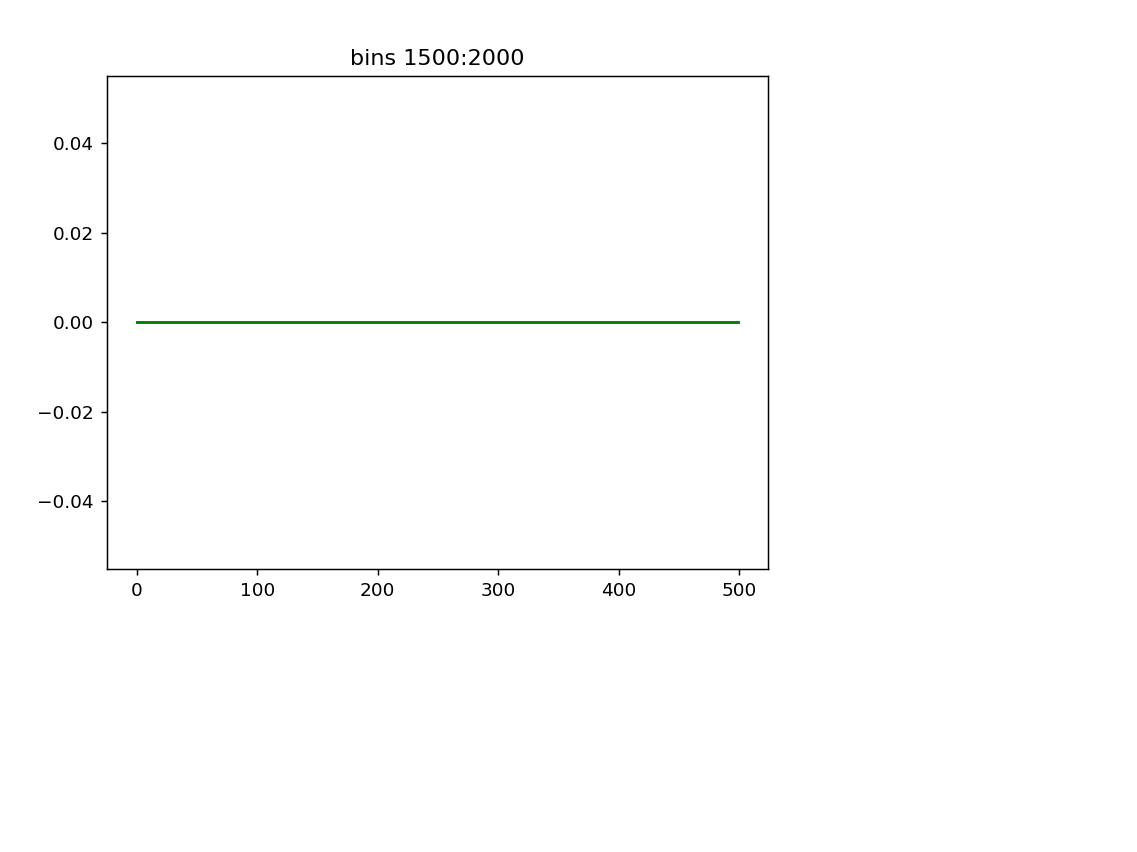

np.max(kde_A) =  0.38452148 np.max(kde_B) =  0.3630371 np.max(old_kde) =  0.7416992
scaled ratio = 0.518 


<IPython.core.display.Javascript object>


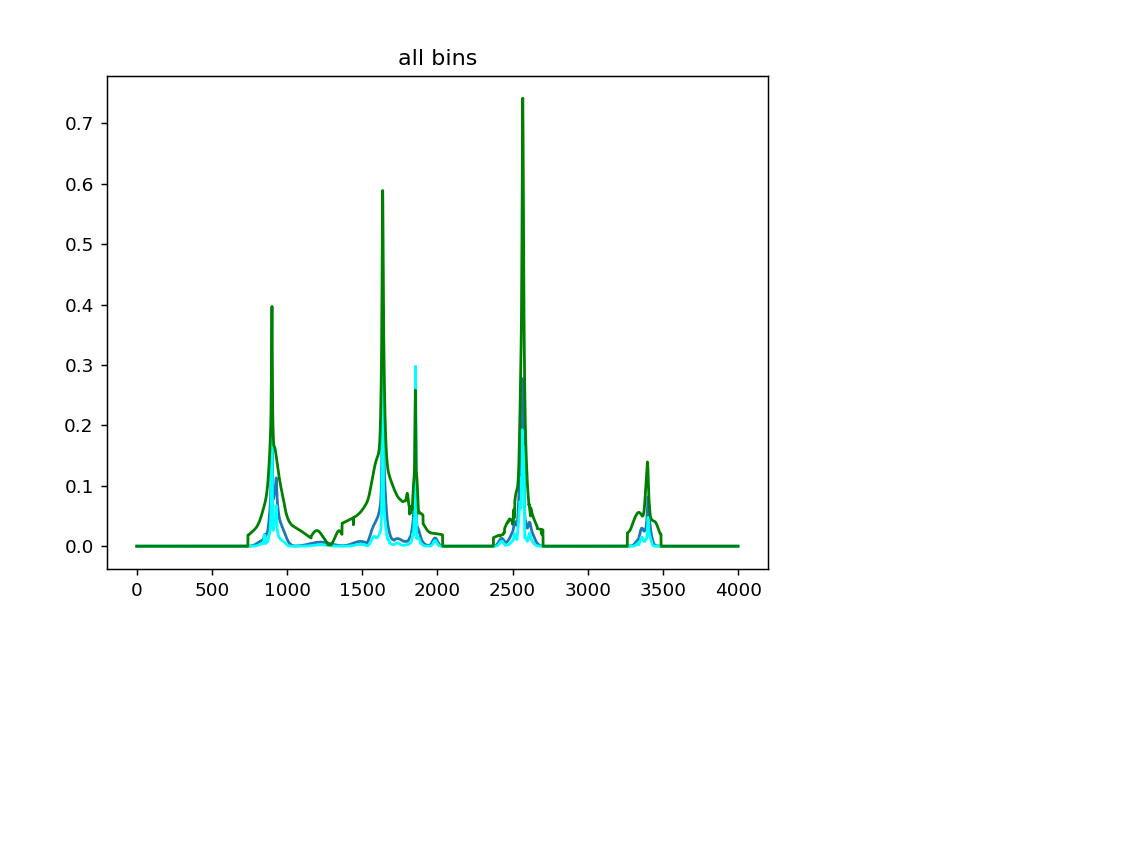

<IPython.core.display.Javascript object>


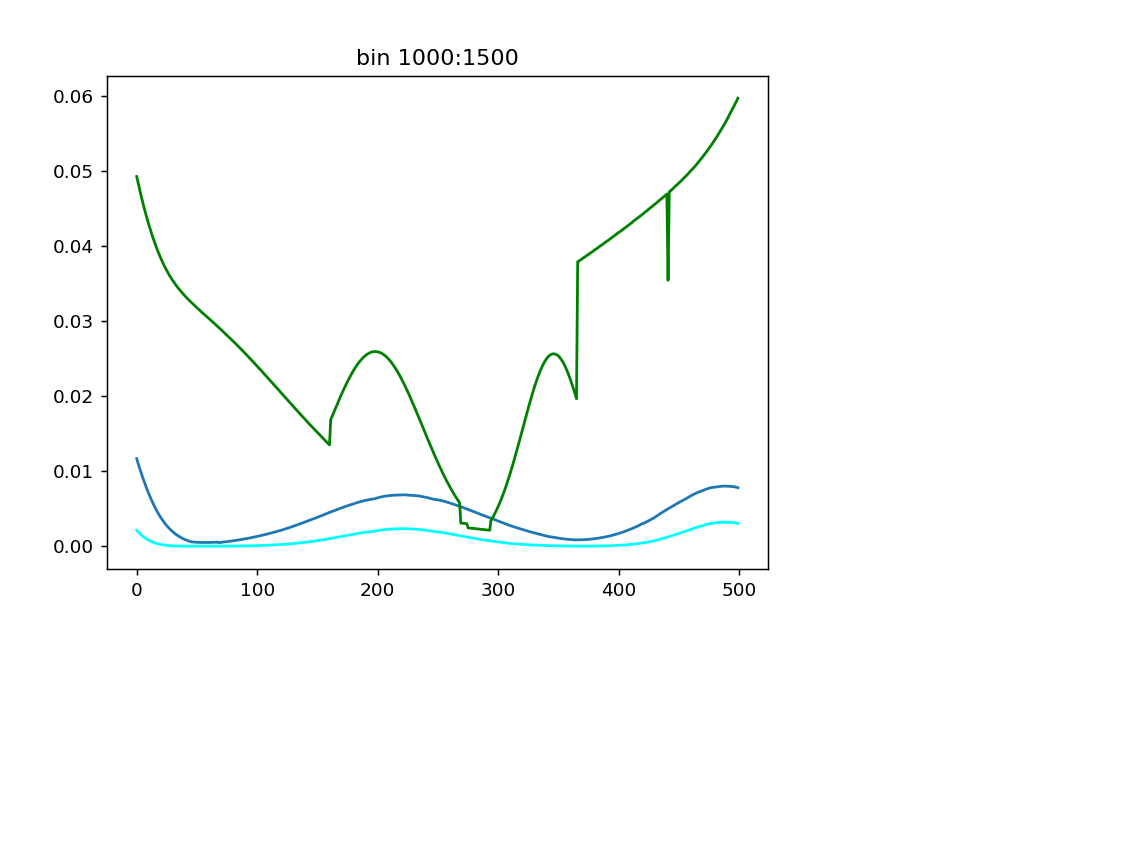

<IPython.core.display.Javascript object>


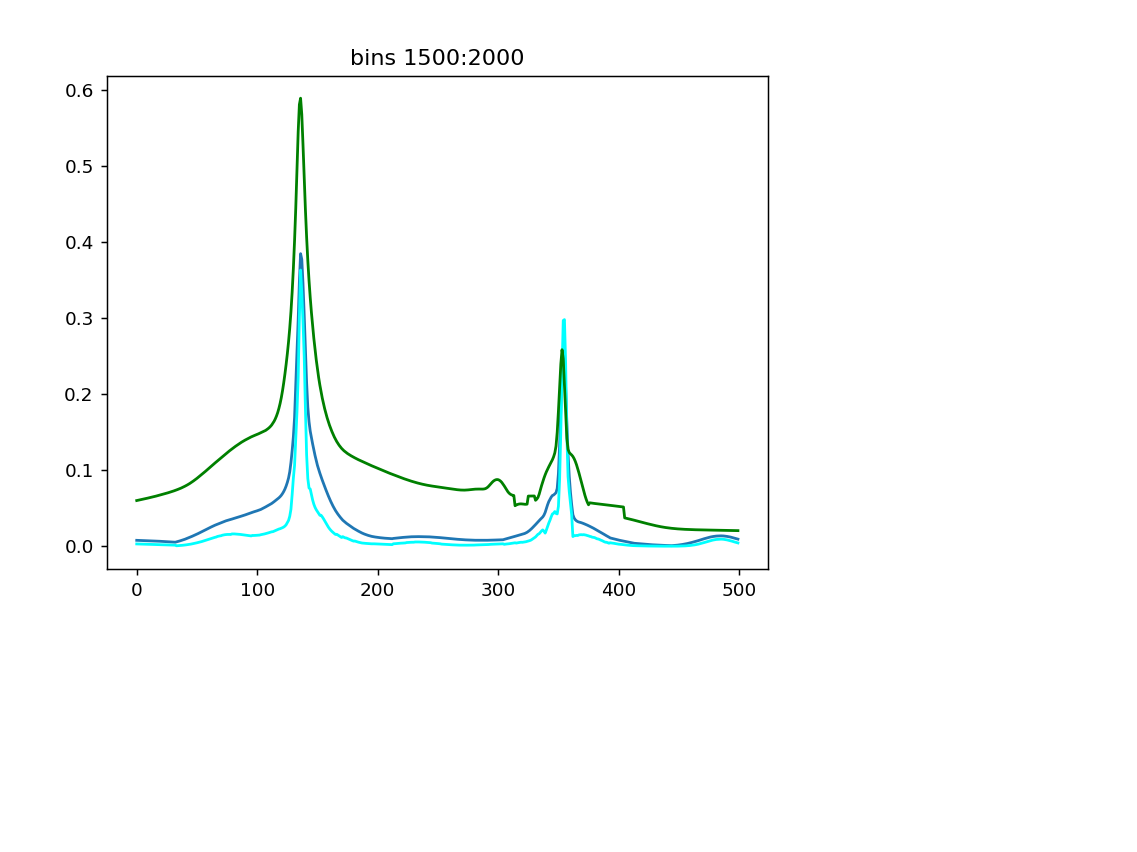

np.max(kde_A) =  0.49829102 np.max(kde_B) =  0.57128906 np.max(old_kde) =  0.54248047
scaled ratio = 0.919 


<IPython.core.display.Javascript object>


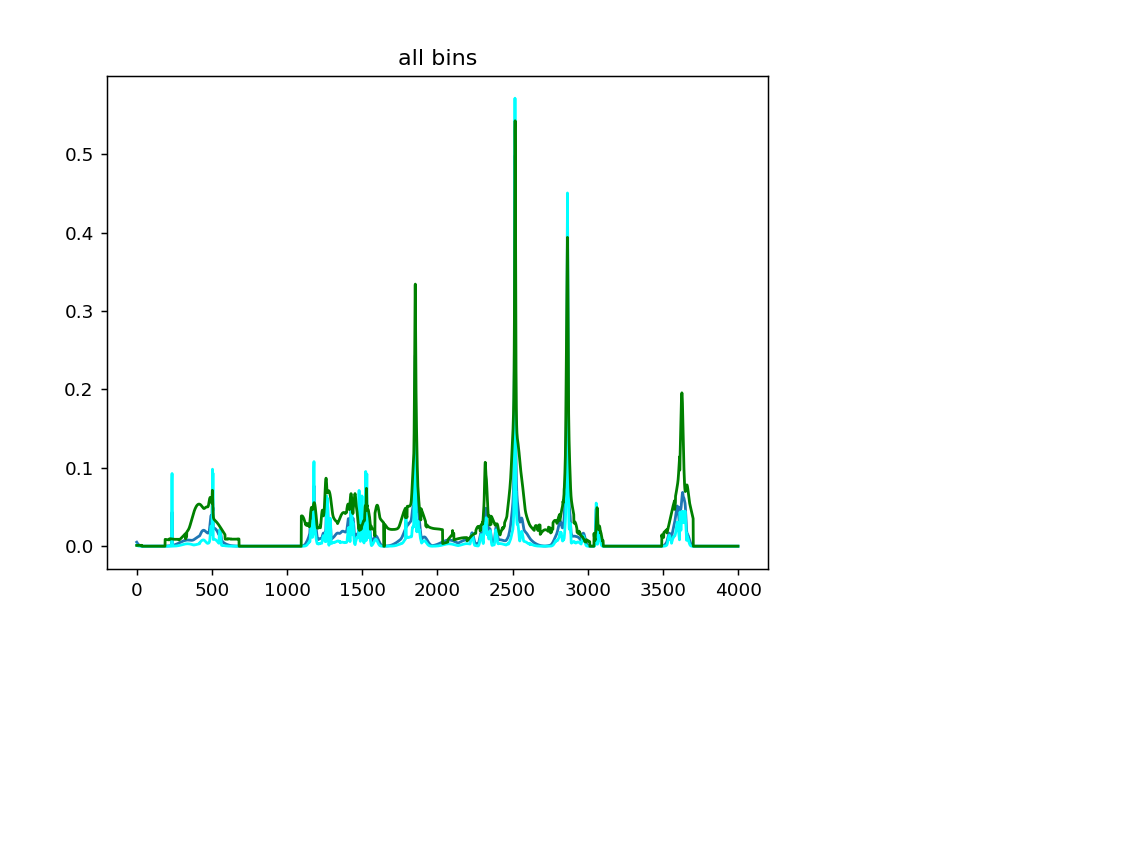

<IPython.core.display.Javascript object>


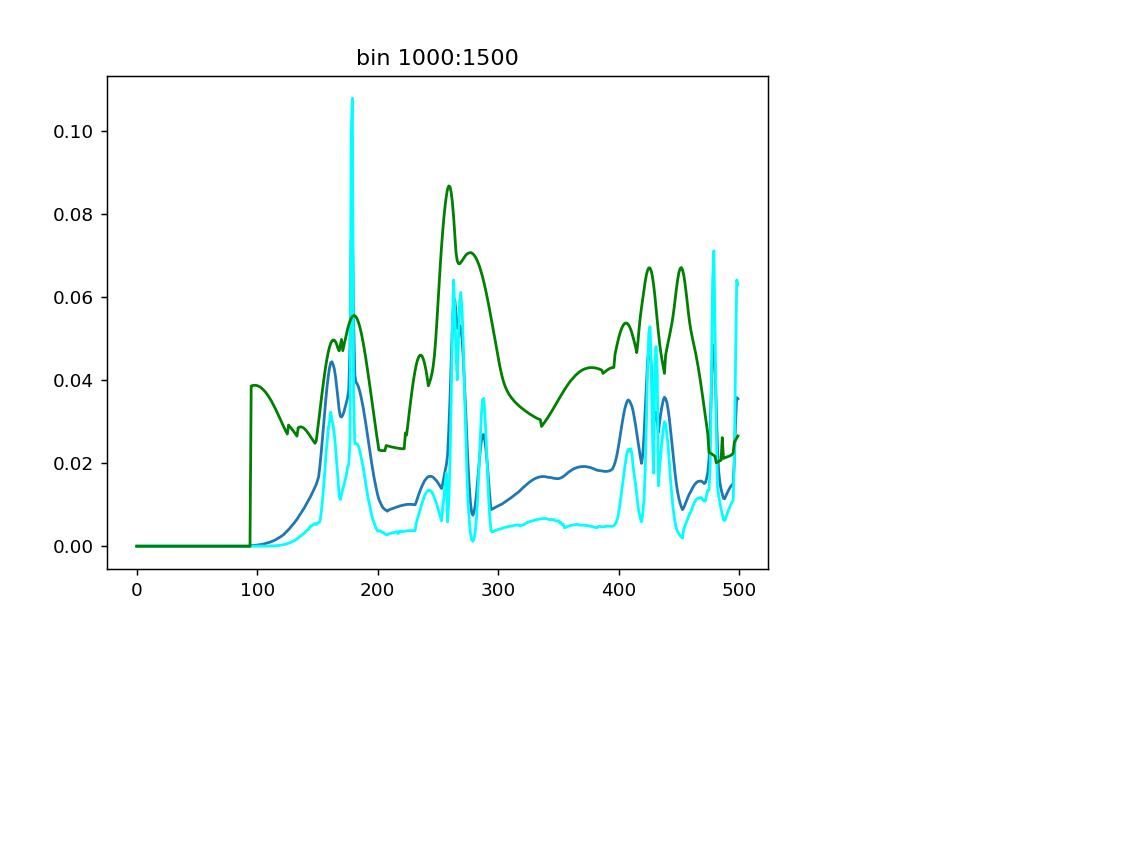

<IPython.core.display.Javascript object>


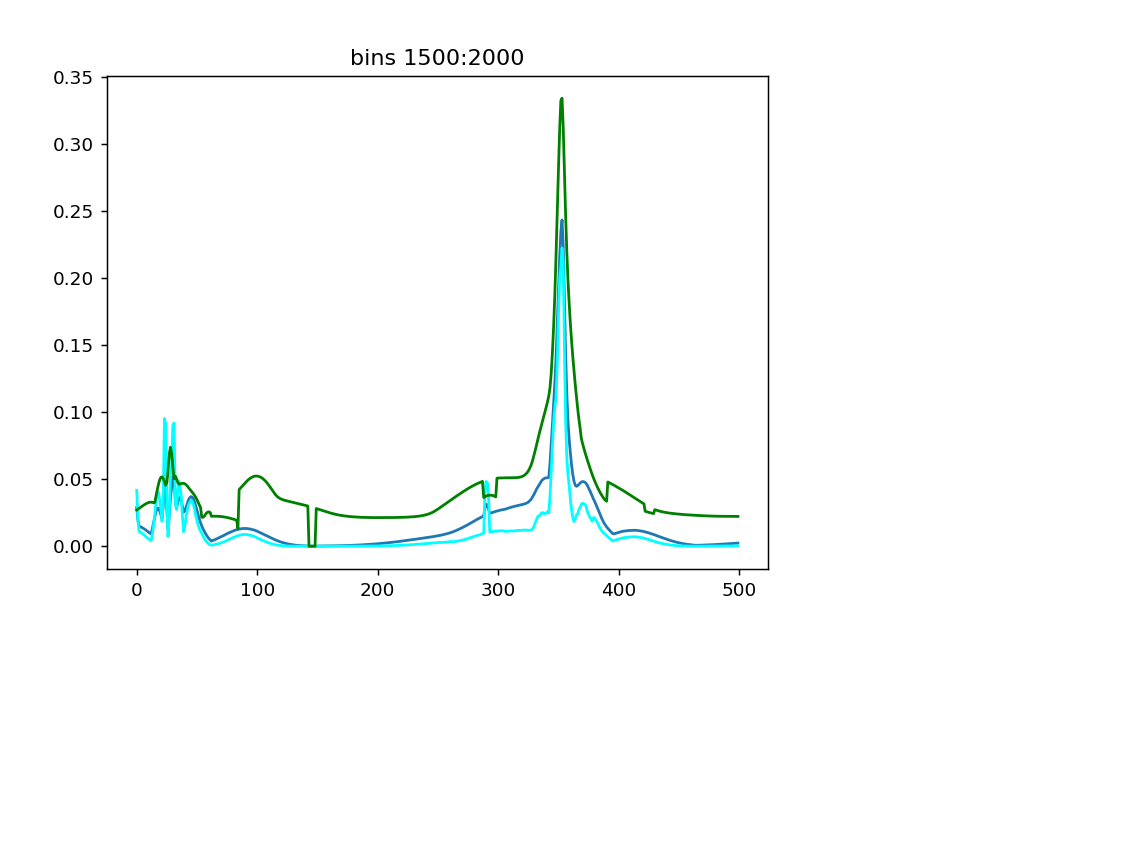

np.max(kde_A) =  0.24645996 np.max(kde_B) =  0.28173828 np.max(old_kde) =  0.31225586
scaled ratio = 0.789 


<IPython.core.display.Javascript object>


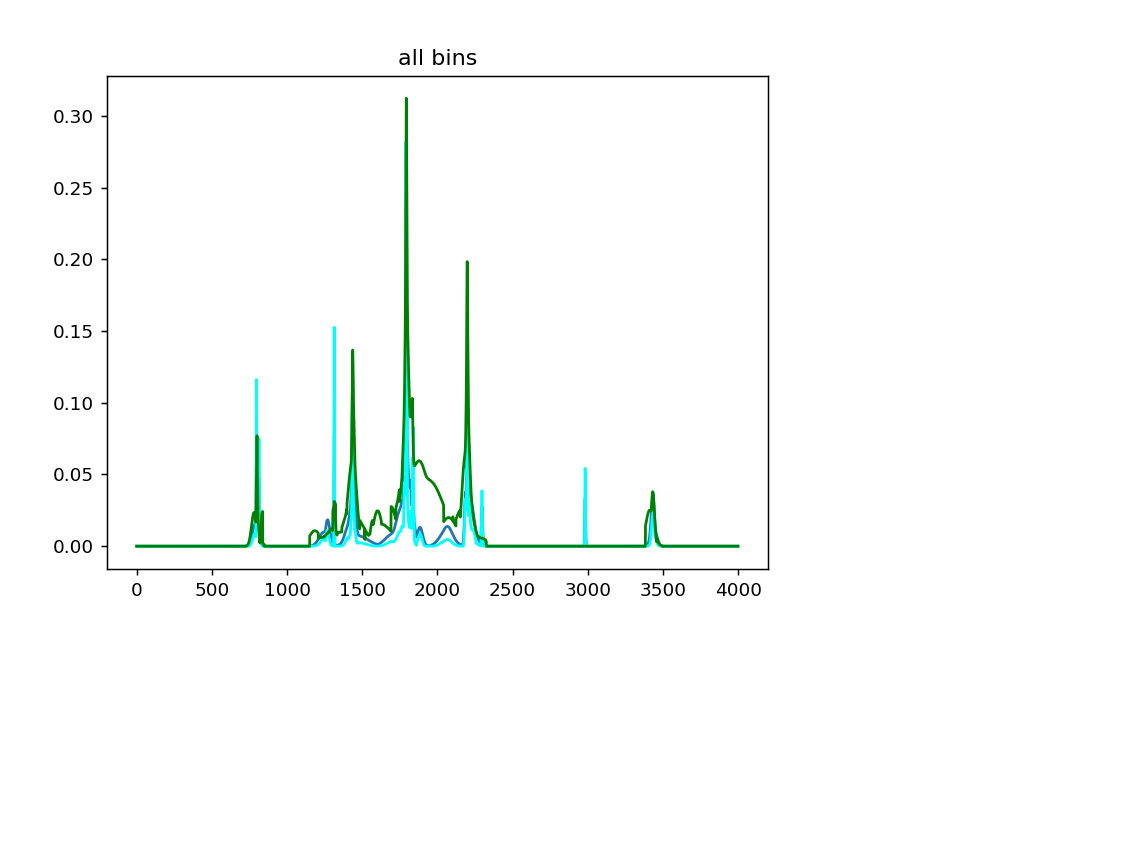

<IPython.core.display.Javascript object>


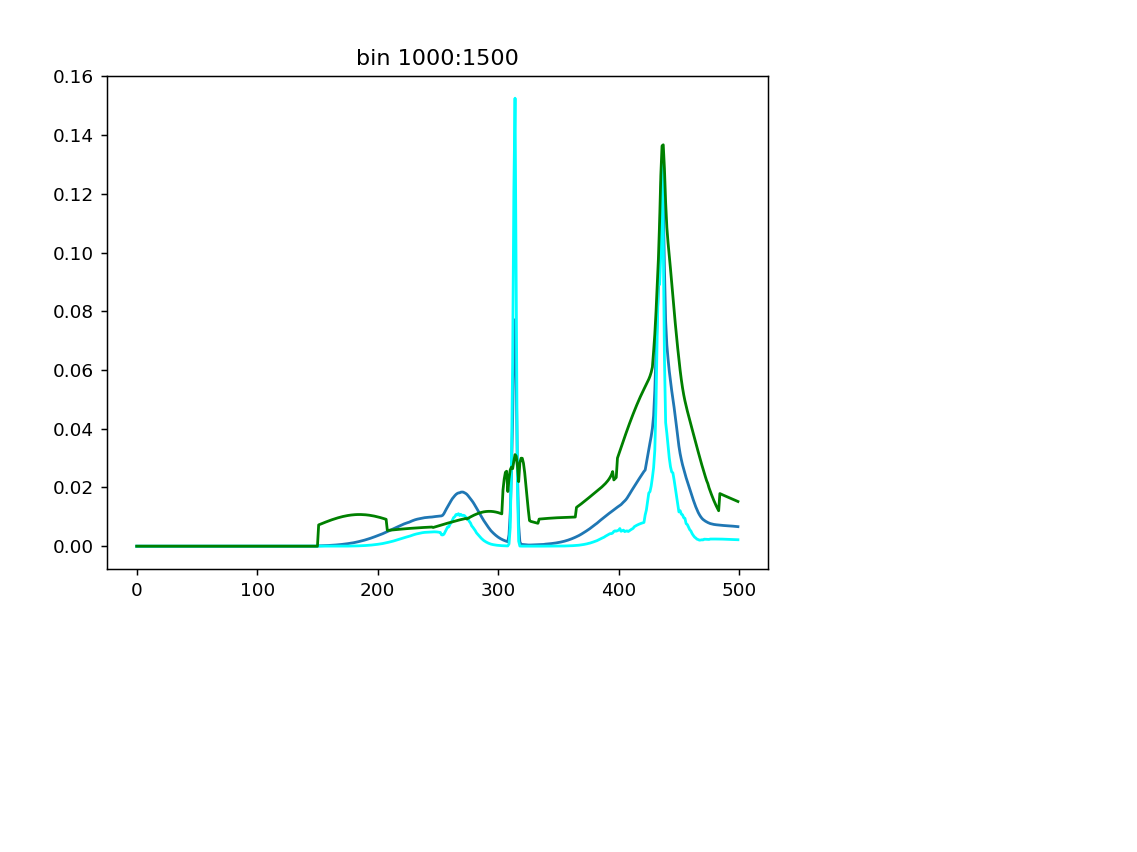

<IPython.core.display.Javascript object>


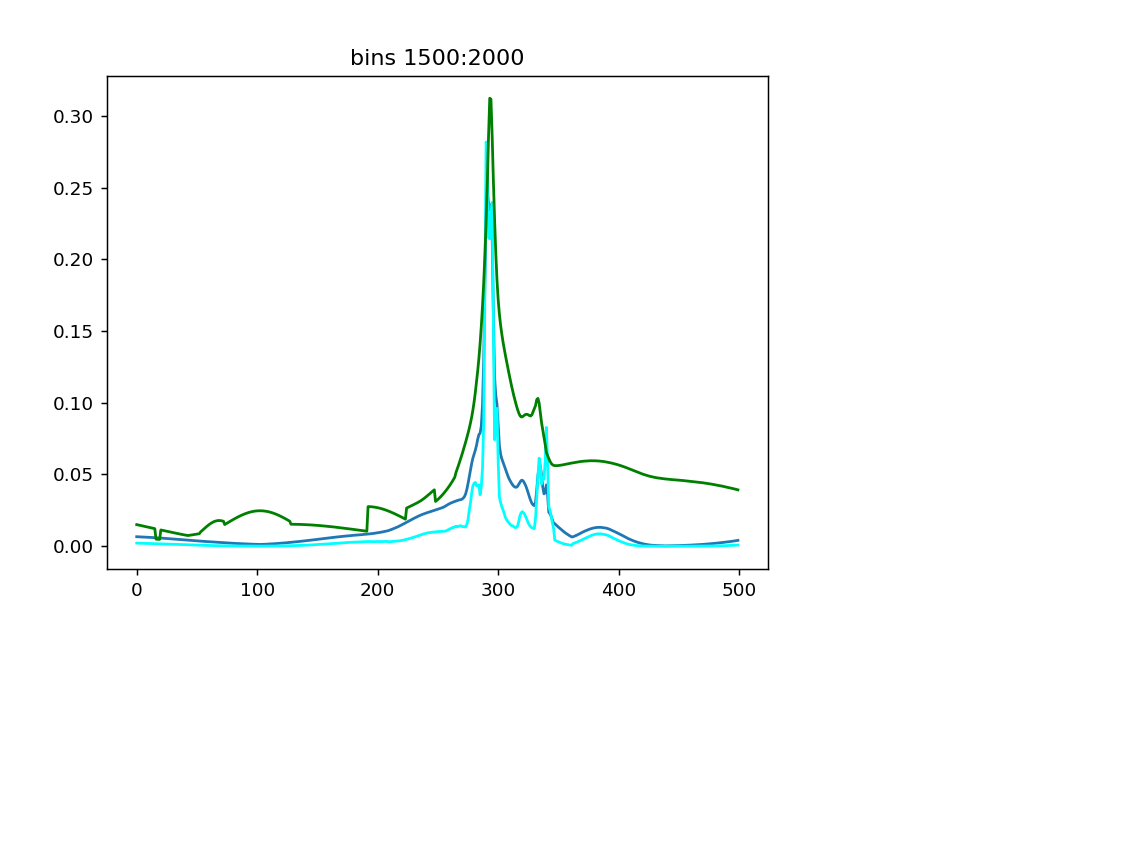

np.max(kde_A) =  0.5810547 np.max(kde_B) =  0.5673828 np.max(old_kde) =  0.77197266
scaled ratio = 0.753 


<IPython.core.display.Javascript object>


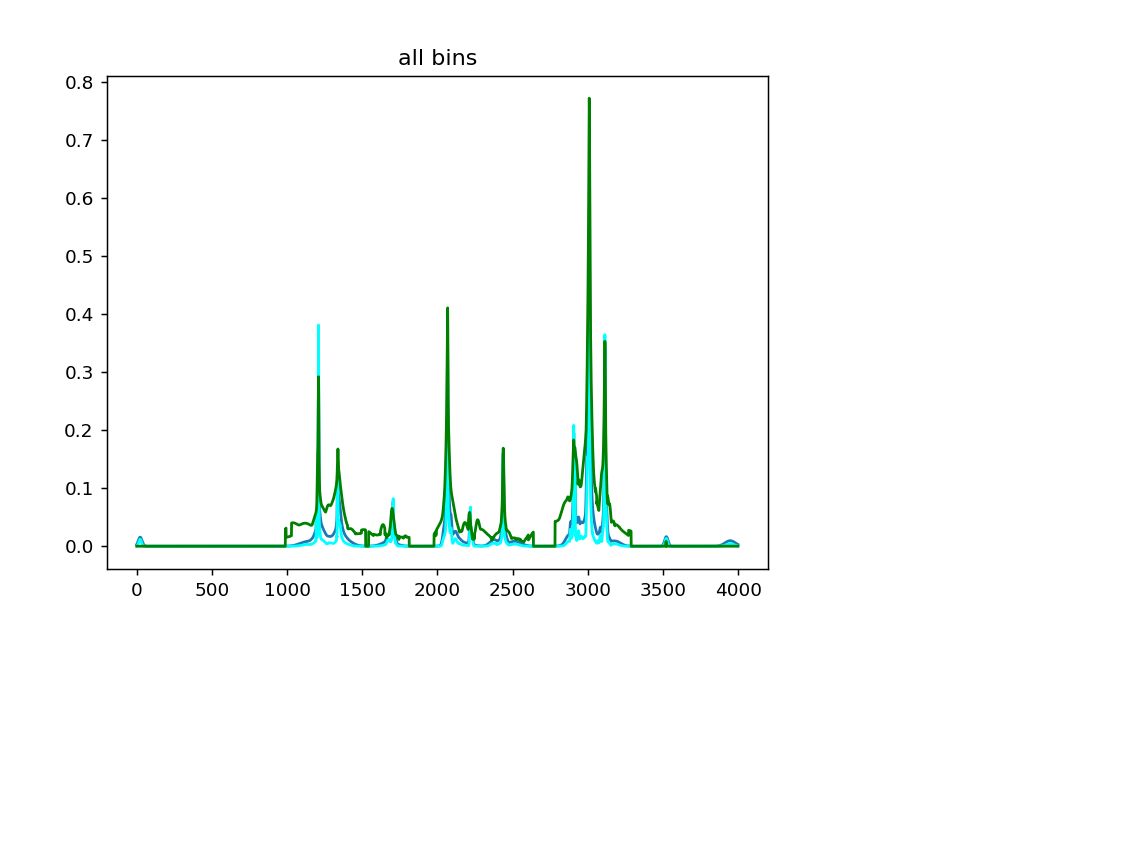

<IPython.core.display.Javascript object>


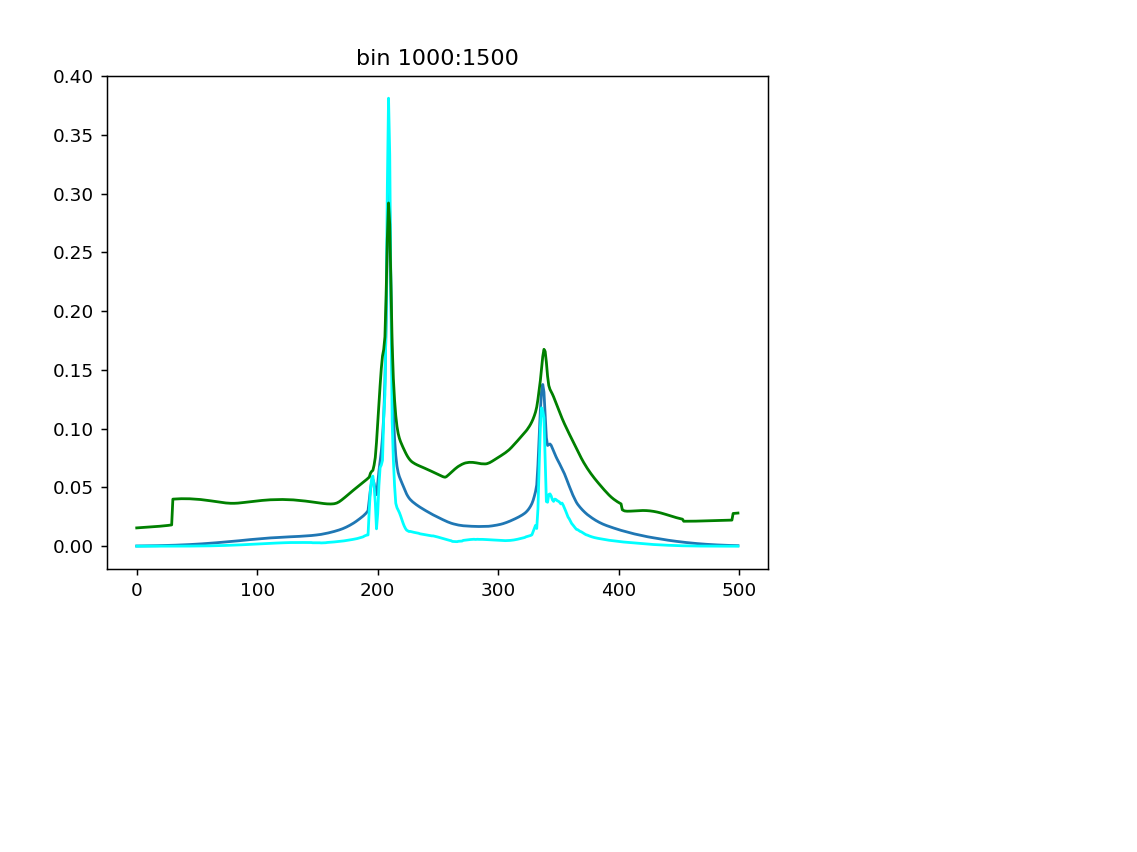

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


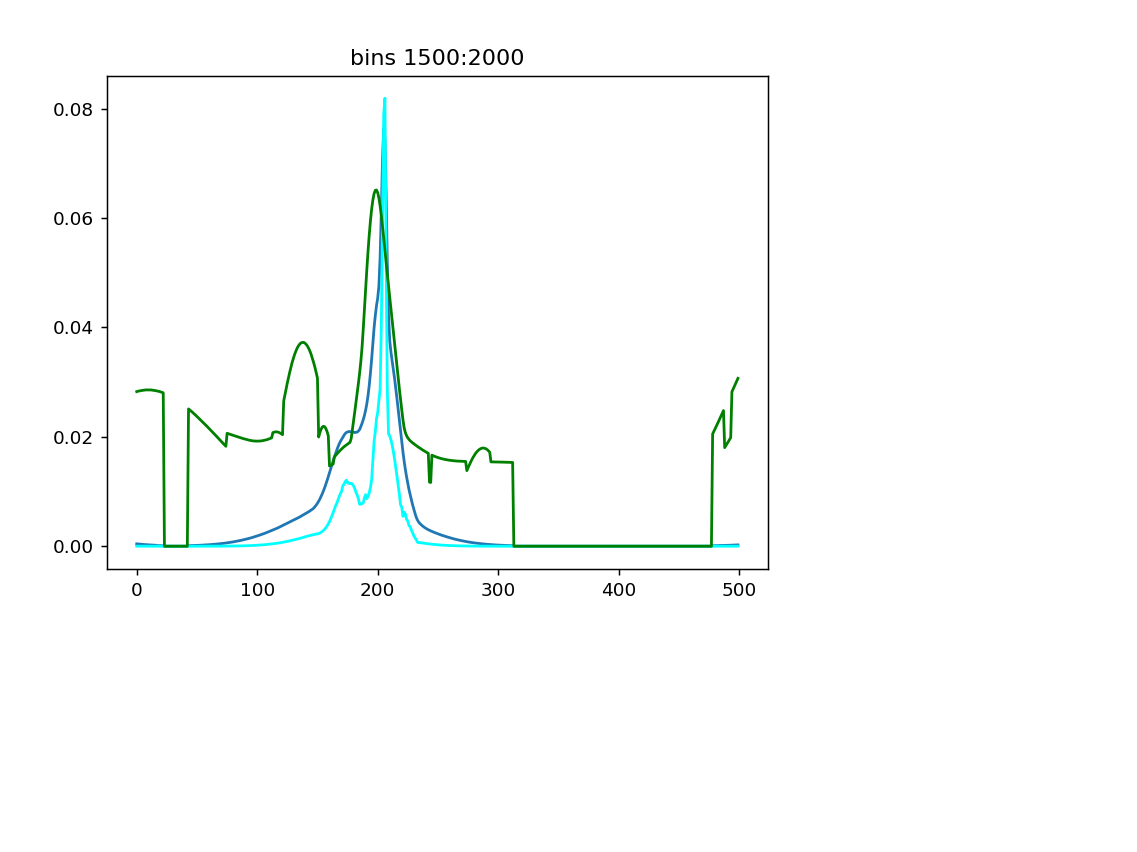

np.max(kde_A) =  0.80615234 np.max(kde_B) =  0.71435547 np.max(old_kde) =  1.0126953
scaled ratio = 0.796 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


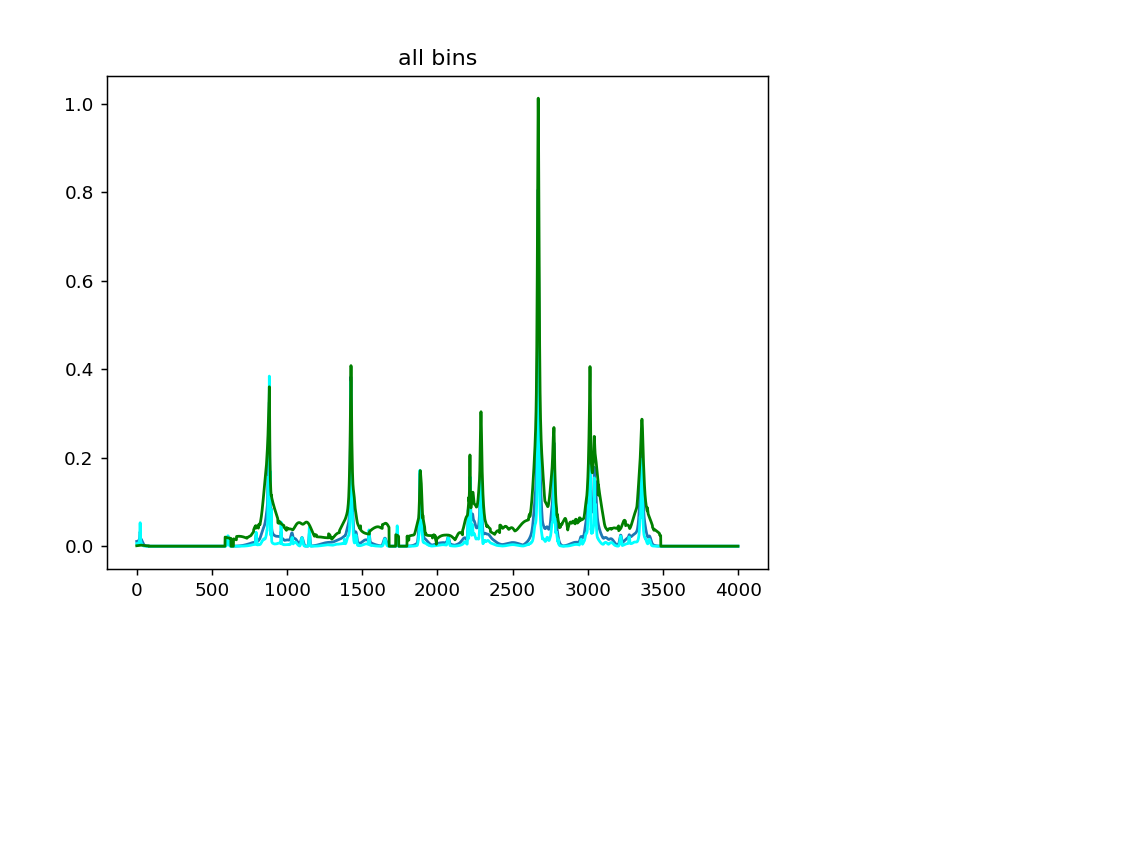

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


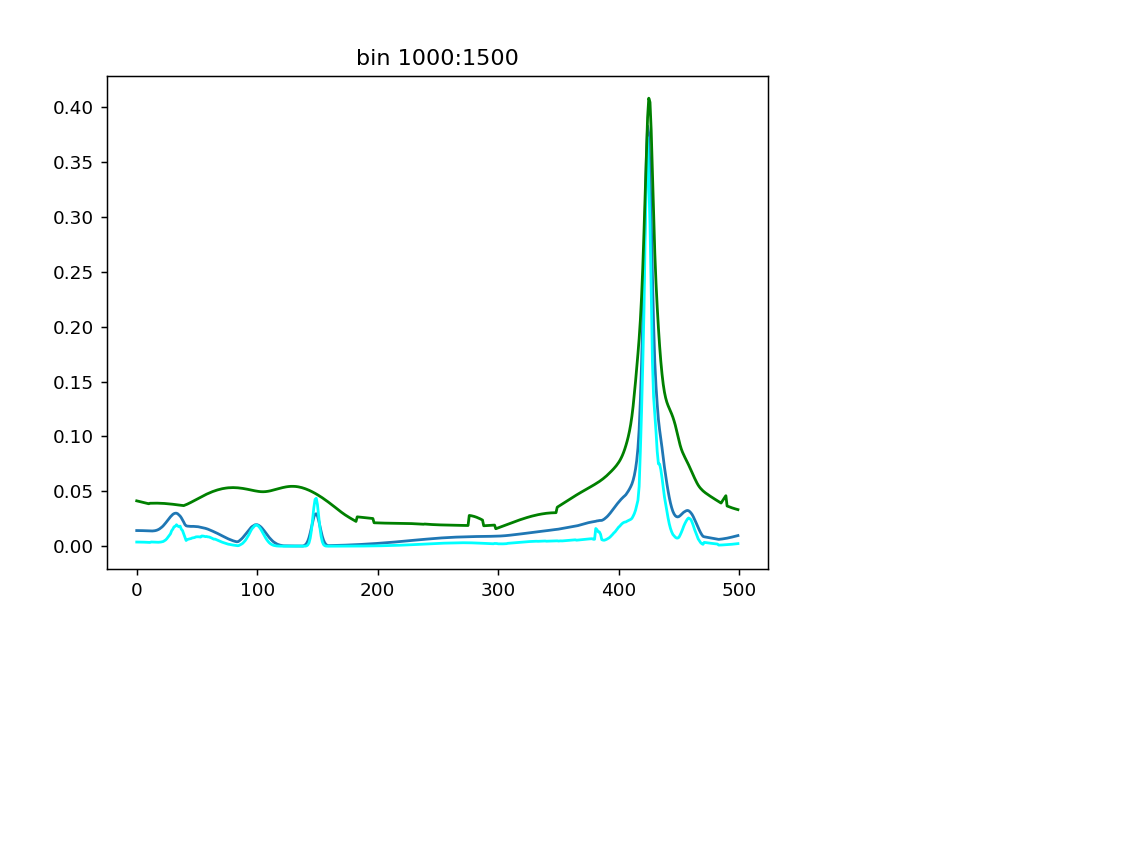

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


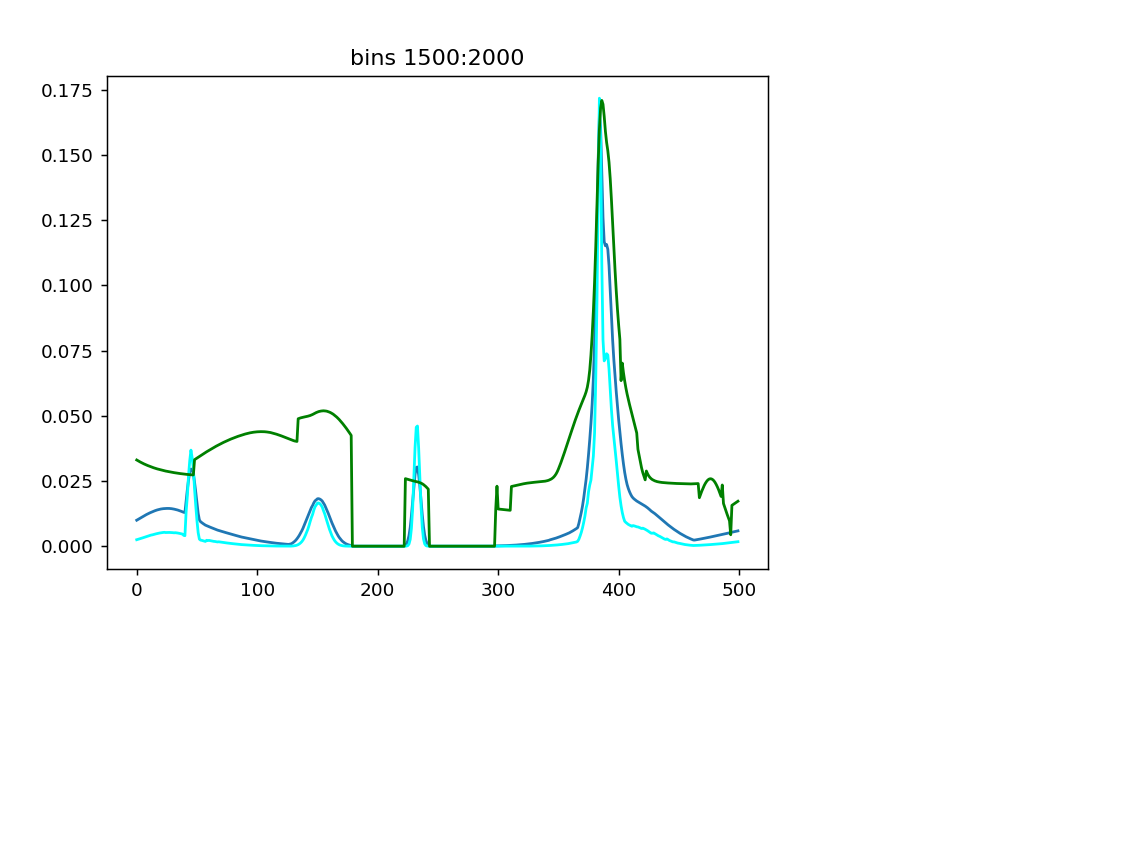

np.max(kde_A) =  0.5522461 np.max(kde_B) =  0.5776367 np.max(old_kde) =  0.74365234
scaled ratio = 0.743 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


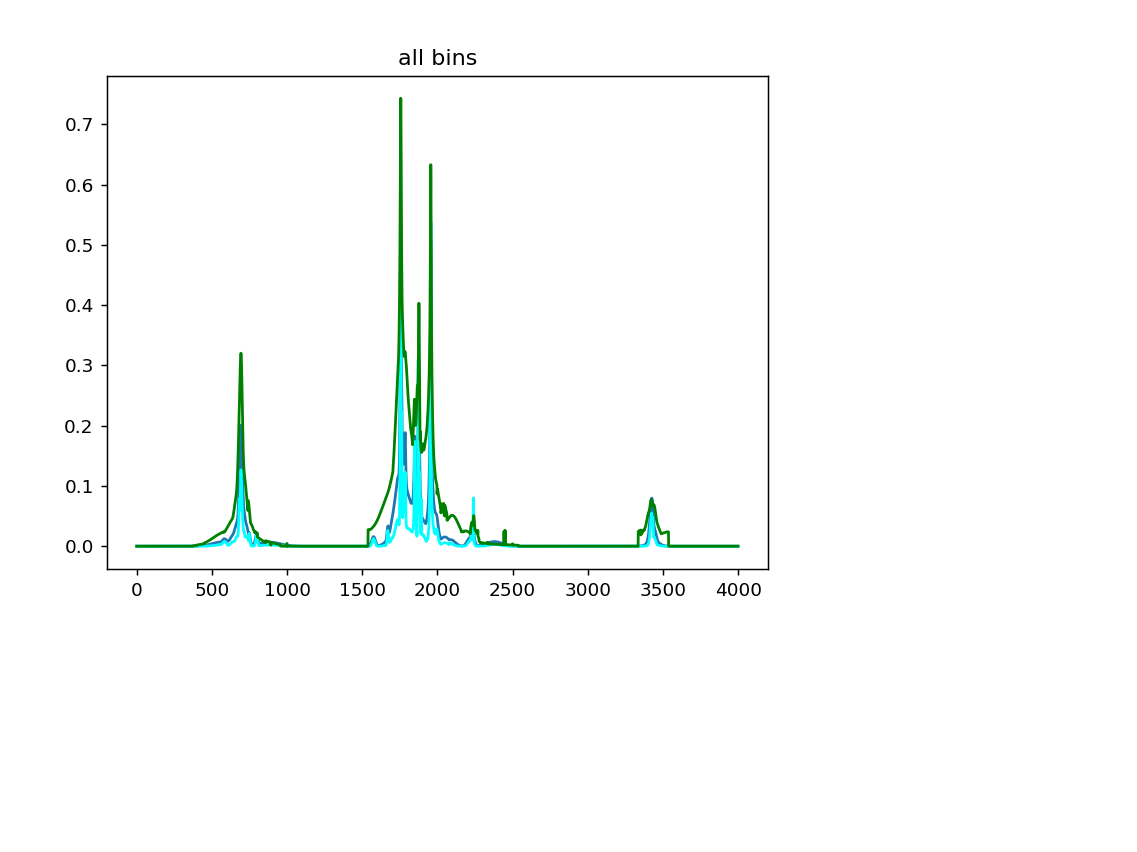

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


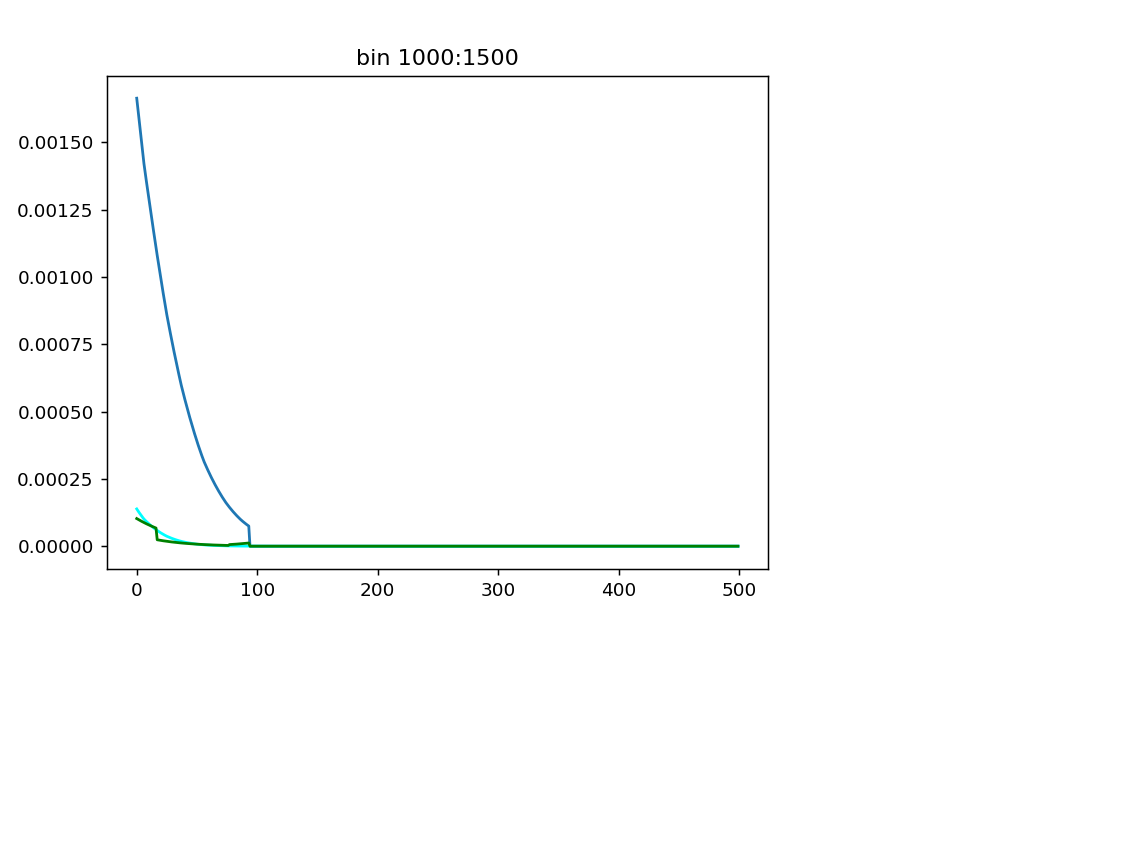

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


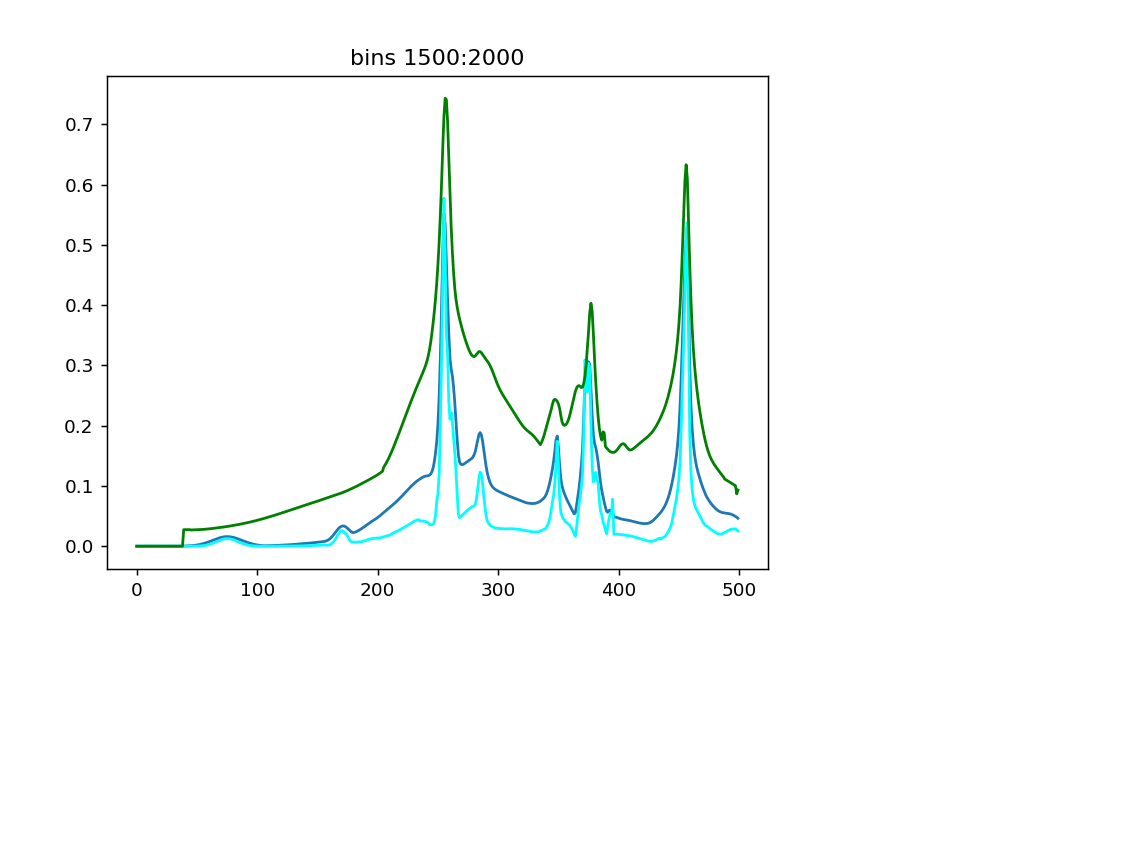

np.max(kde_A) =  0.3088379 np.max(kde_B) =  0.35473633 np.max(old_kde) =  0.38623047
scaled ratio = 0.800 


/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  del sys.path[0]


<IPython.core.display.Javascript object>


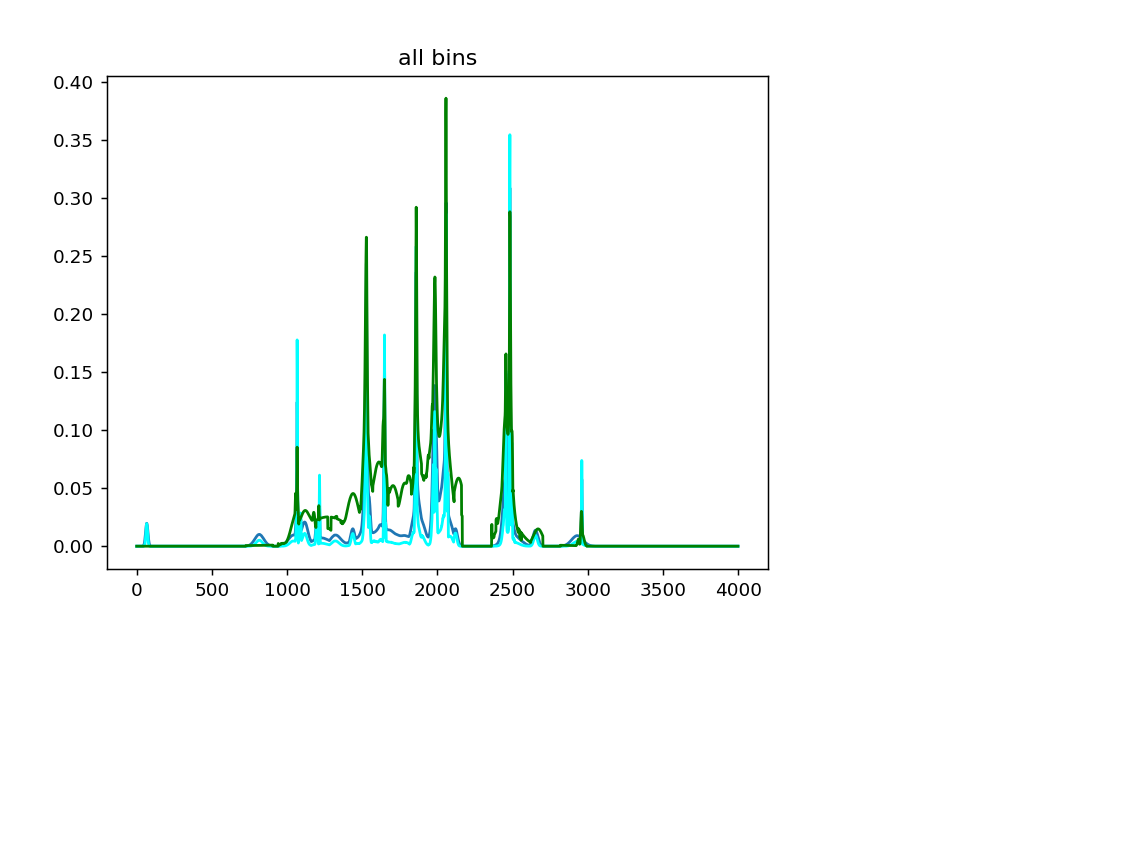

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


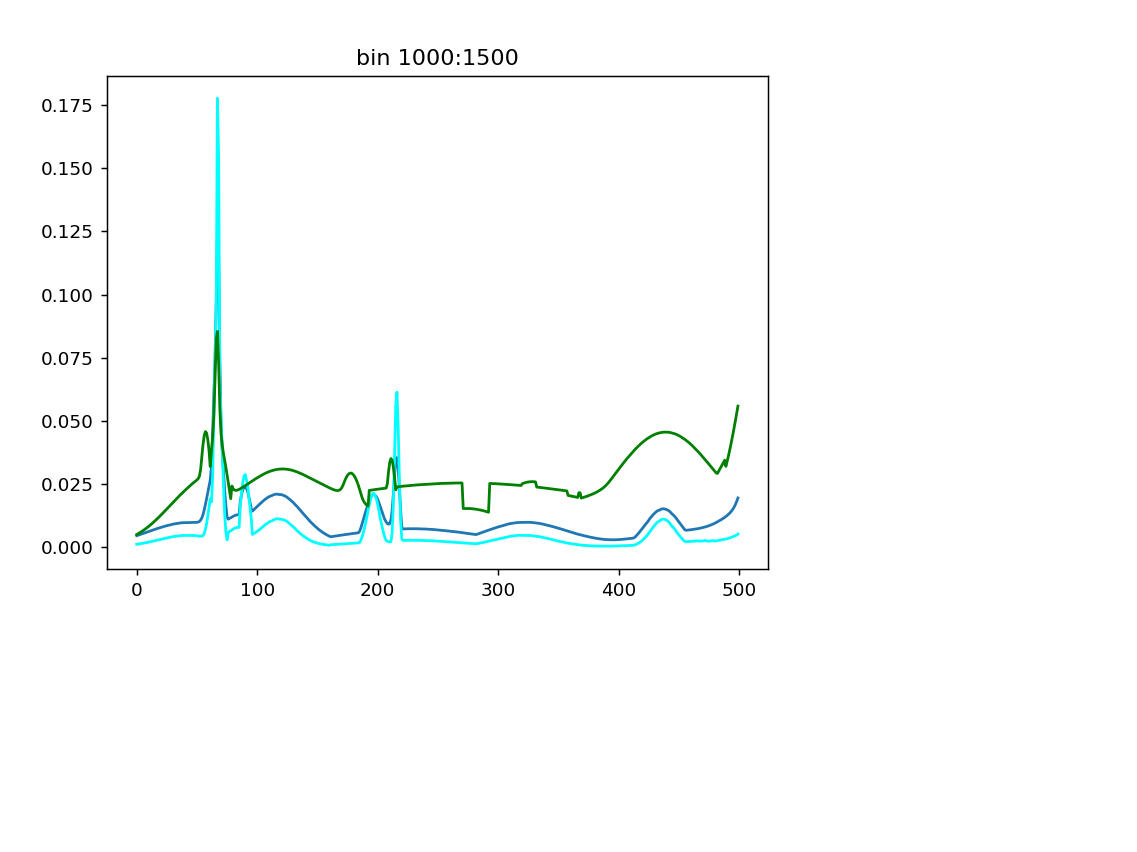

/home/sokoloff/.local/lib/python3.7/site-packages/ipykernel_launcher.py:33: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


<IPython.core.display.Javascript object>


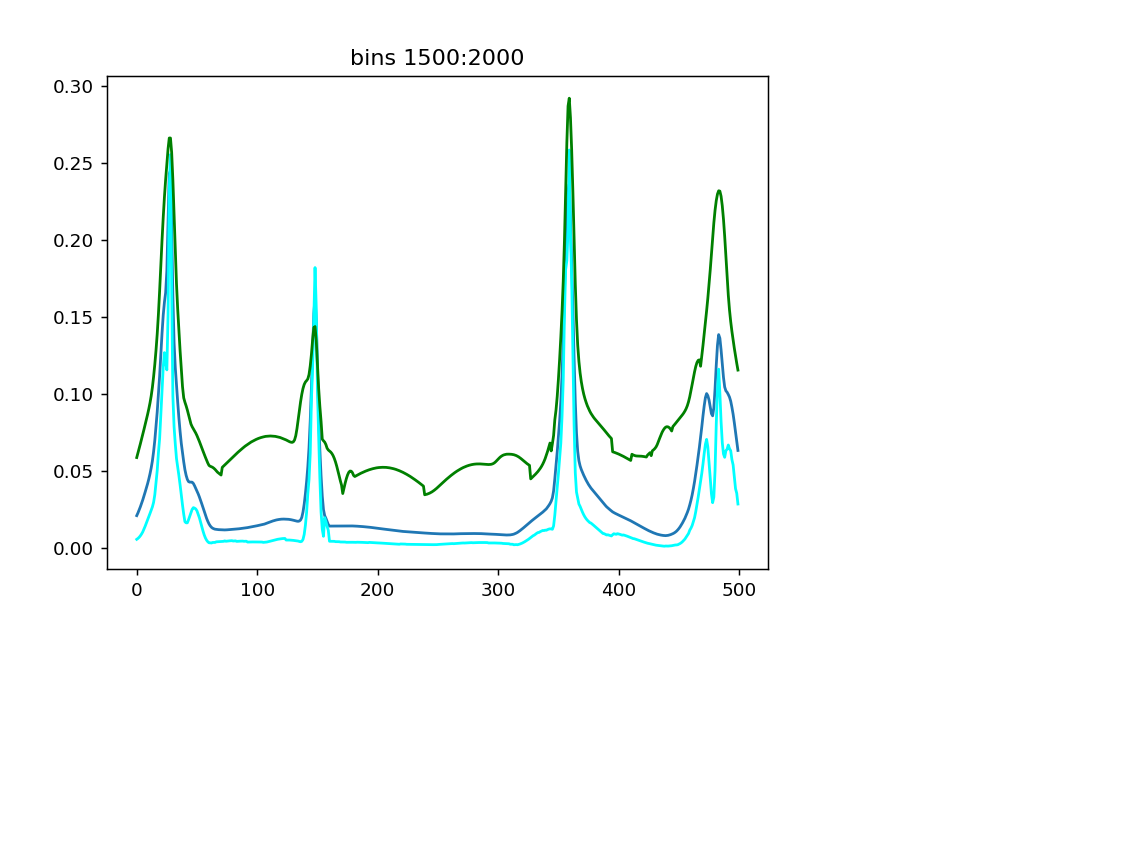

In [7]:
print("X_A,shape = ", X_A.shape)
print("len(X_A) = ",len(X_A))
##for i in range(len(X_A)):
for i in range(10):
  kde_A = X_A[i,0,:]
  kde_B = 0.5*X_B[i,0,:]
  old_kde = kernel[i,0,:]
  print("np.max(kde_A) = ",np.max(kde_A), "np.max(kde_B) = ",np.max(kde_B), "np.max(old_kde) = ",np.max(old_kde))
  ratio =  np.max(kde_A)/np.max(old_kde)
  print("scaled ratio = %5.3f " %ratio)  

  if (i<10):
    plt.figure()
    kde_A = X_A[i,0,:]
    kde_B = 0.5*X_B[i,0,:]
    old_kde = kernel[i,0,:]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("all bins")
    plt.show()

    plt.figure()
    kde_A = X_A[i,0,1000:1500]
    kde_B = 0.5*X_B[i,0,1000:1500]
    old_kde = kernel[i,0,1000:1500]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("bin 1000:1500")
    plt.show()
    
    plt.figure()
    kde_A = X_A[i,0,1500:2000]
    kde_B = 0.5*X_B[i,0,1500:2000]
    old_kde = kernel[i,0,1500:2000]
    plt.plot(kde_A)
    plt.plot(kde_B,color="cyan")
    plt.plot(old_kde,color="g")
    plt.title("bins 1500:2000")
    plt.show()